___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [8]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

# Read Data

In [9]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [10]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [13]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

### Dataya Dönmek Gerekirse

In [14]:
df2 = df.copy()

## Feature Engineering

In [15]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [16]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [17]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

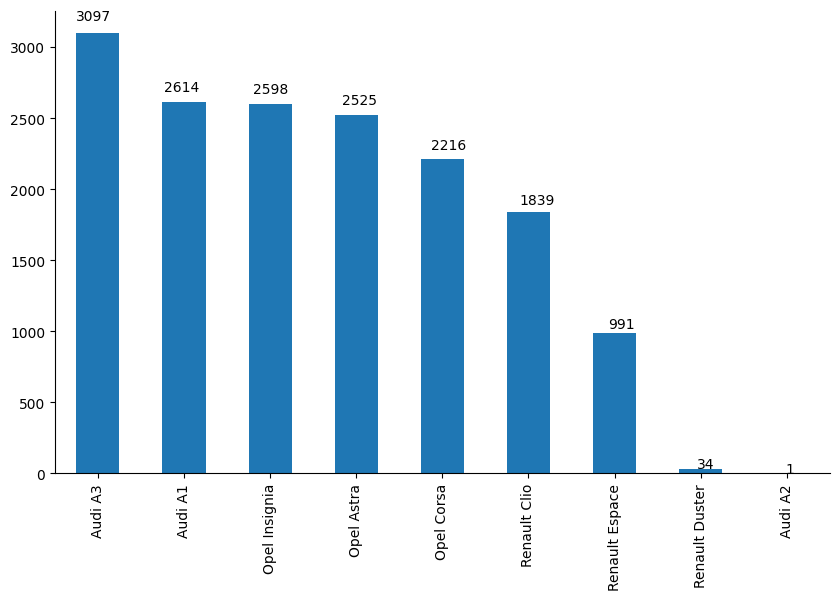

In [18]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))
    
# ax.bar_label(ax.containers[0]);

In [19]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1135.0,front,4.9


In [20]:
df.drop(index=[2614], inplace =True)

In [21]:
df.shape

(15914, 23)

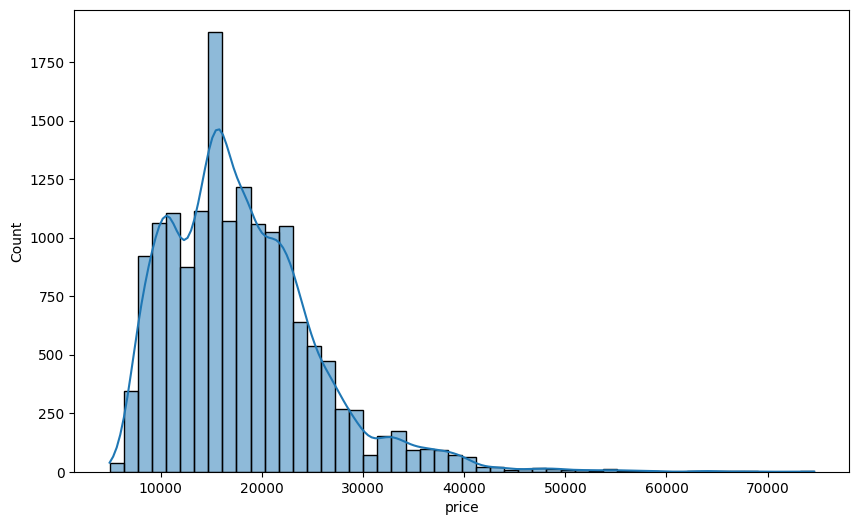

In [22]:
sns.histplot(df.price, bins=50, kde=True);

### skewness

In [23]:
skew(df.price)

1.236330745564795

In [24]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3


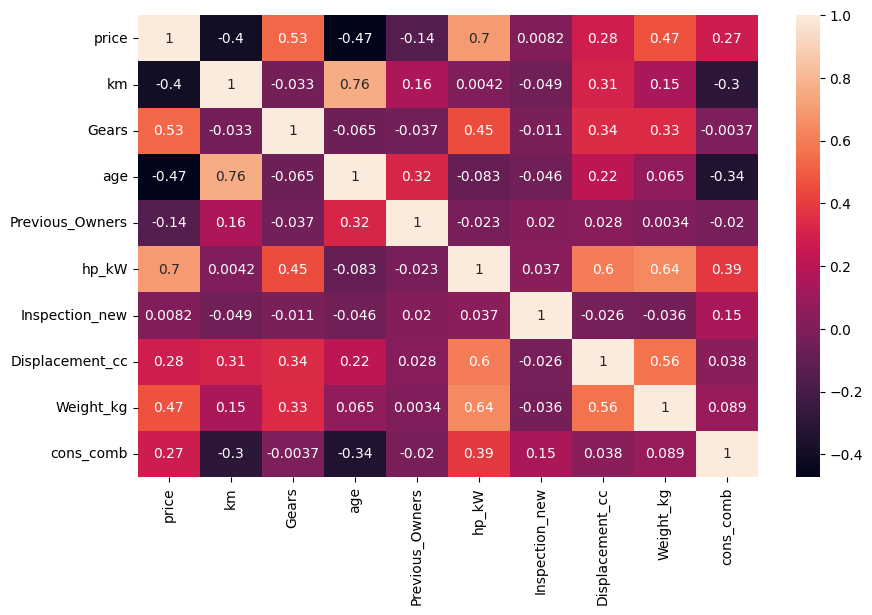

In [25]:
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [26]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [27]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

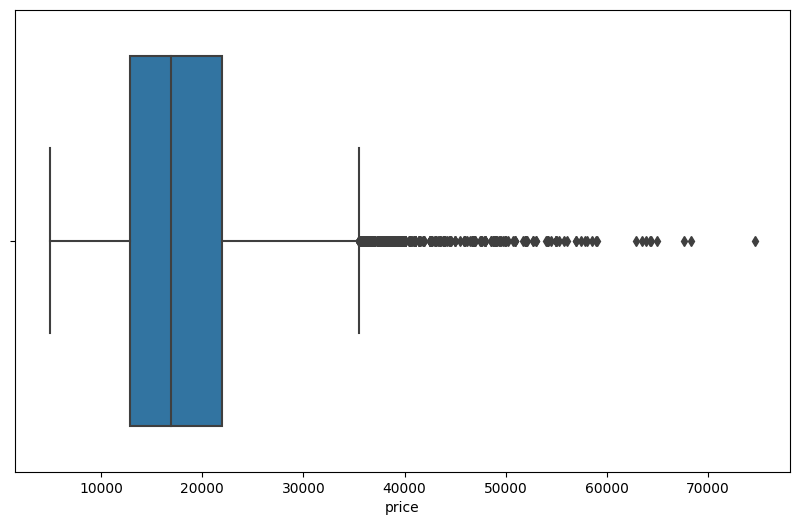

In [28]:
sns.boxplot(df.price);

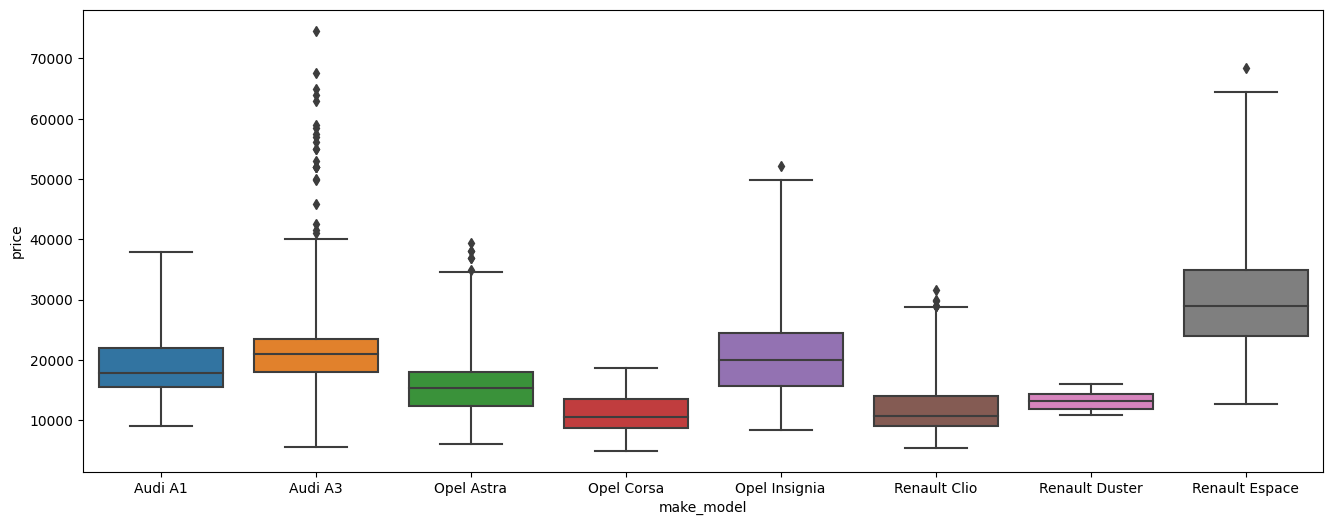

In [29]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

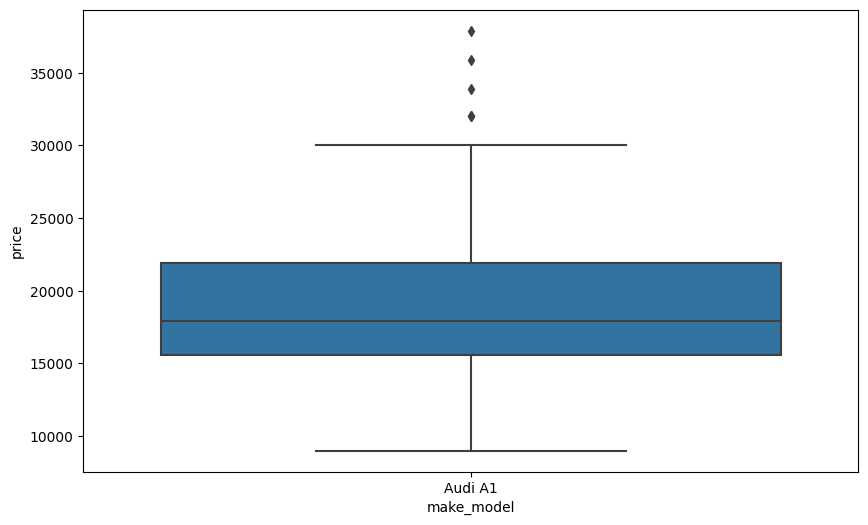

In [30]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [31]:
df[df["make_model"]== "Audi A1"]["price"]

0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2614, dtype: int64

In [32]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


## Get dummies 

In [33]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [34]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [35]:
df = pd.get_dummies(df, drop_first =True)

In [36]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [37]:
df.shape

(15914, 133)

In [38]:
df.isnull().any().any()

False

In [39]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

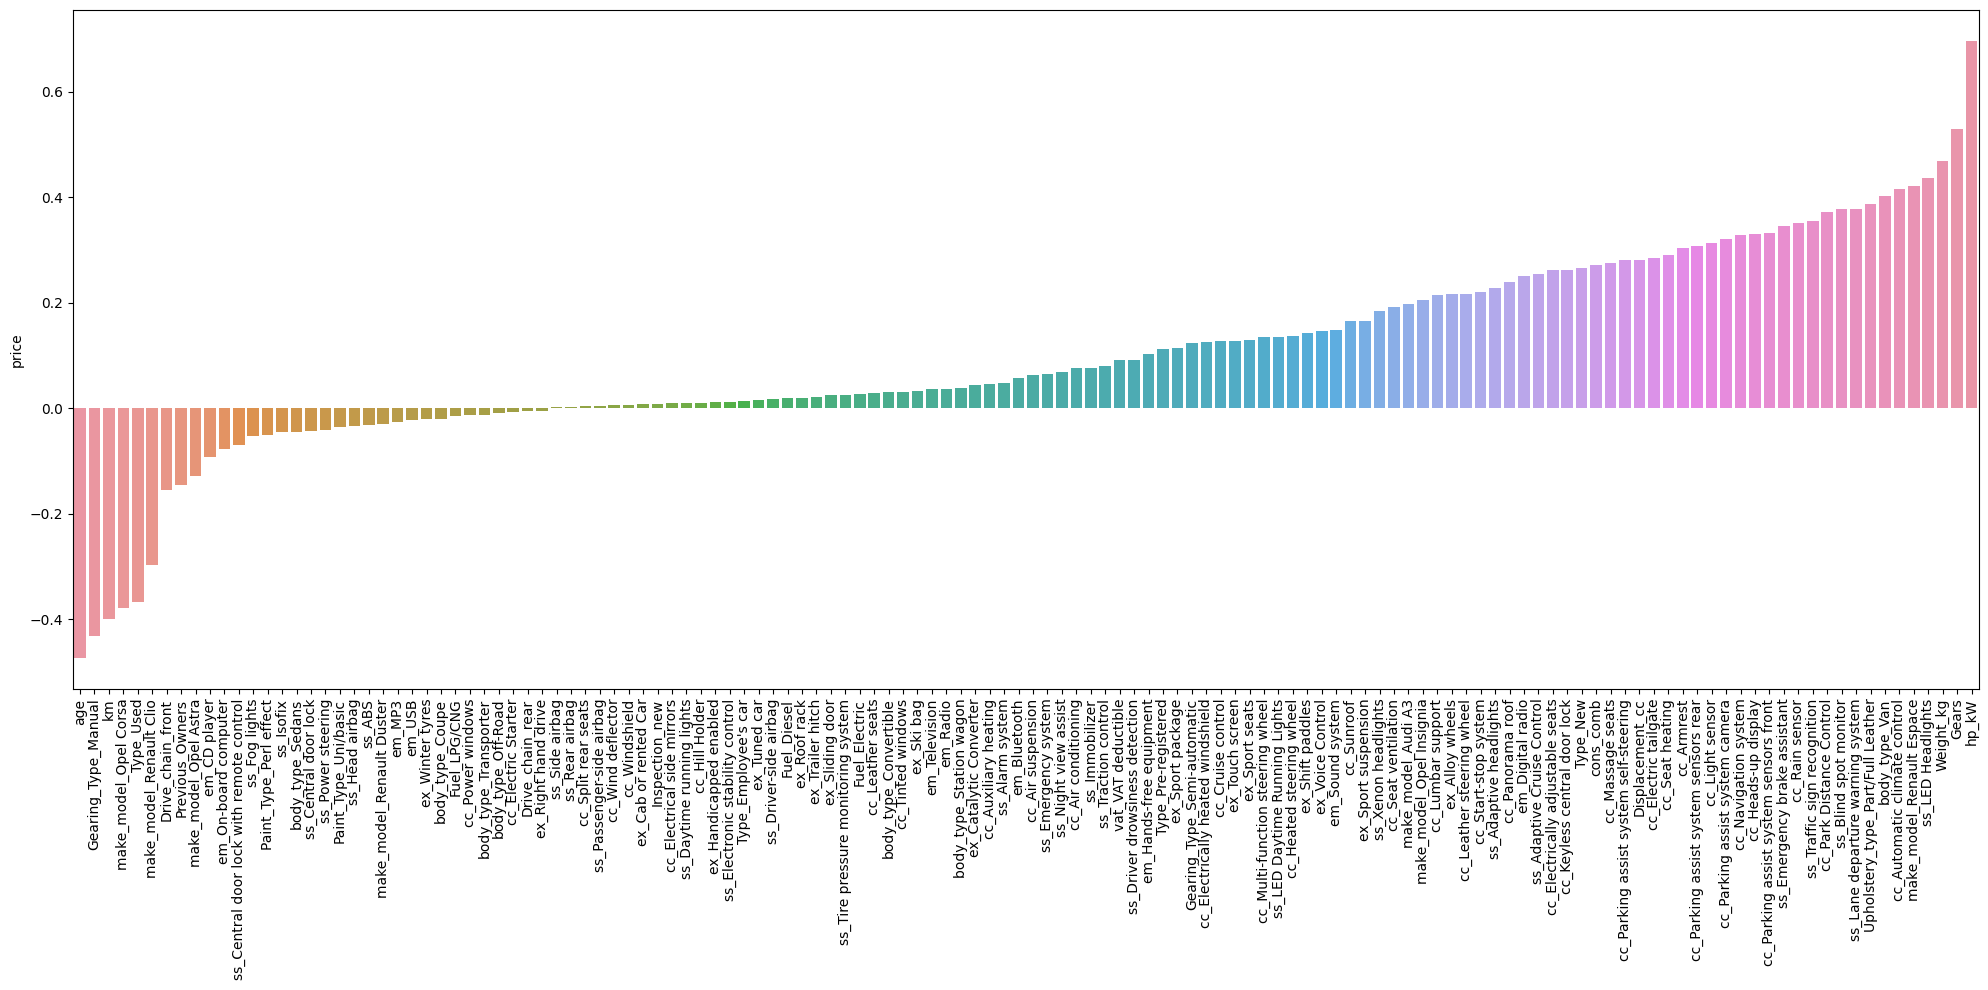

In [40]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

### random_state=42

### test size = 0.2

In [41]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1

In [42]:
X= df.drop(columns="price")
y= df.price

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape

(12731, 132)

In [45]:
X_test.shape

(3183, 132)

## Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [46]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [47]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
pd.options.display.float_format = '{:.3f}'.format #daha rahat okunabilsin diye

In [49]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


### Adjusted R2 Score

In [50]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [51]:
y_pred = lm.predict(X_test)

In [52]:
adj_r2(y_test, y_pred, df)

0.8846640715800351

### Cross Validate

In [53]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [54]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.126,0.008,0.869,0.893,-1796.920,-1684.021,-7411680.847,-5785085.584,-2722.440,-2405.220
1,0.130,0.008,0.902,0.889,-1693.786,-1703.932,-5444805.727,-5998631.235,-2333.411,-2449.210
2,0.117,0.000,0.881,0.892,-1774.840,-1691.681,-6816392.331,-5848345.621,-2610.822,-2418.335
3,0.112,0.008,0.899,0.890,-1651.155,-1709.194,-5183104.431,-6027224.207,-2276.643,-2455.041
4,0.124,0.000,0.871,0.893,-1762.633,-1695.891,-6547950.549,-5879632.391,-2558.896,-2424.795
5,0.116,0.008,0.885,0.891,-1680.670,-1707.824,-5587261.975,-5983669.271,-2363.739,-2446.154
6,0.131,0.008,0.896,0.890,-1677.273,-1707.885,-4955589.641,-6051837.320,-2226.115,-2460.048
7,0.123,0.008,0.891,0.891,-1759.619,-1688.670,-7073807.262,-5823358.607,-2659.663,-2413.164
8,0.123,0.002,0.892,0.890,-1749.306,-1697.121,-6513244.535,-5883601.080,-2552.106,-2425.614
9,0.120,0.008,0.886,0.891,-1679.341,-1704.871,-5713270.933,-5972209.345,-2390.245,-2443.810


In [55]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.887
train_r2                                   0.891
test_neg_mean_absolute_error           -1722.555
train_neg_mean_absolute_error          -1699.109
test_neg_mean_squared_error         -6124710.823
train_neg_mean_squared_error        -5925359.466
test_neg_root_mean_squared_error       -2469.408
train_neg_root_mean_squared_error      -2434.139
dtype: float64

In [56]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.891,0.886
mae,1700.029,1728.915
mse,5935067.388,6267140.944
rmse,2436.199,2503.426


In [57]:
2503/df.price.mean()

0.13887238926767506

### Prediction Error

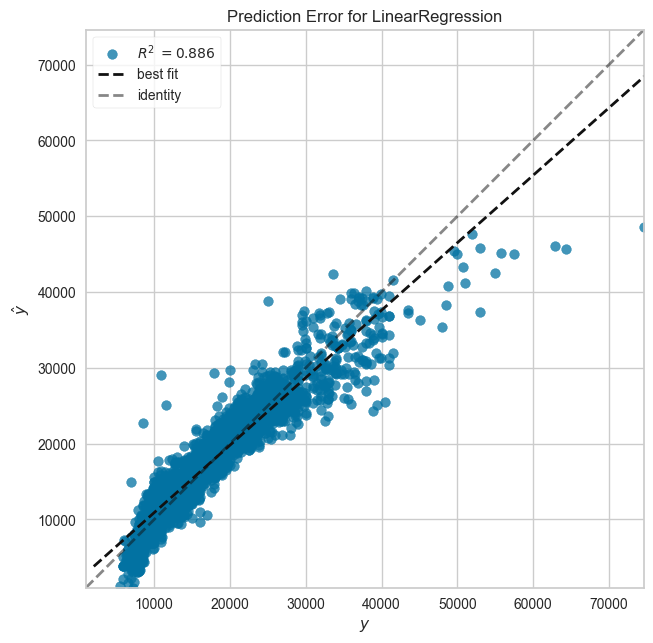

In [58]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

### Residual Plot

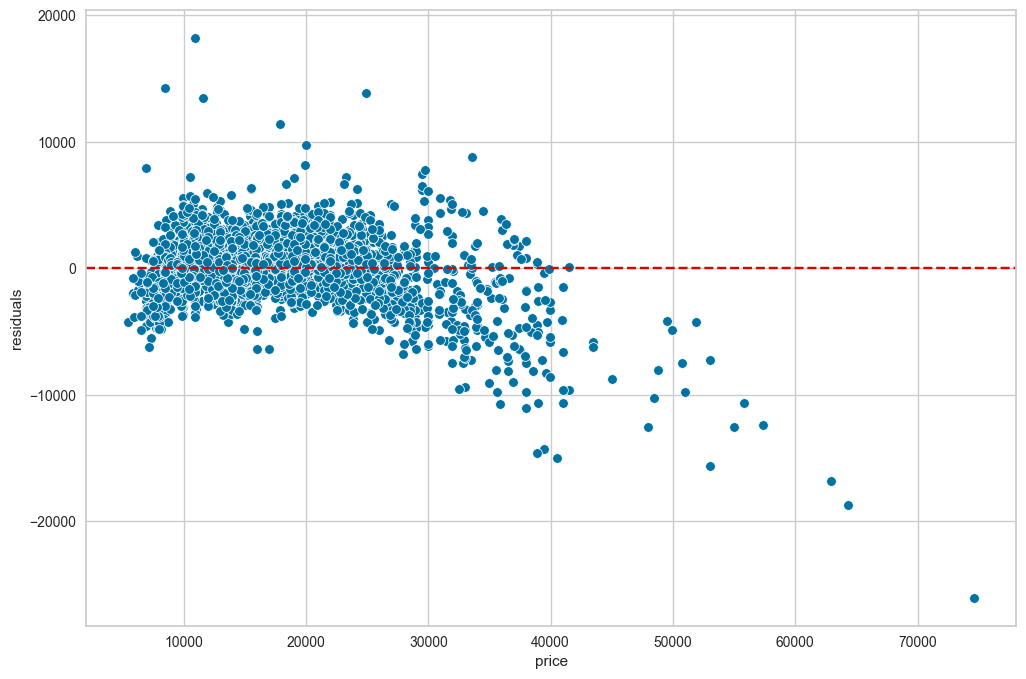

In [59]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

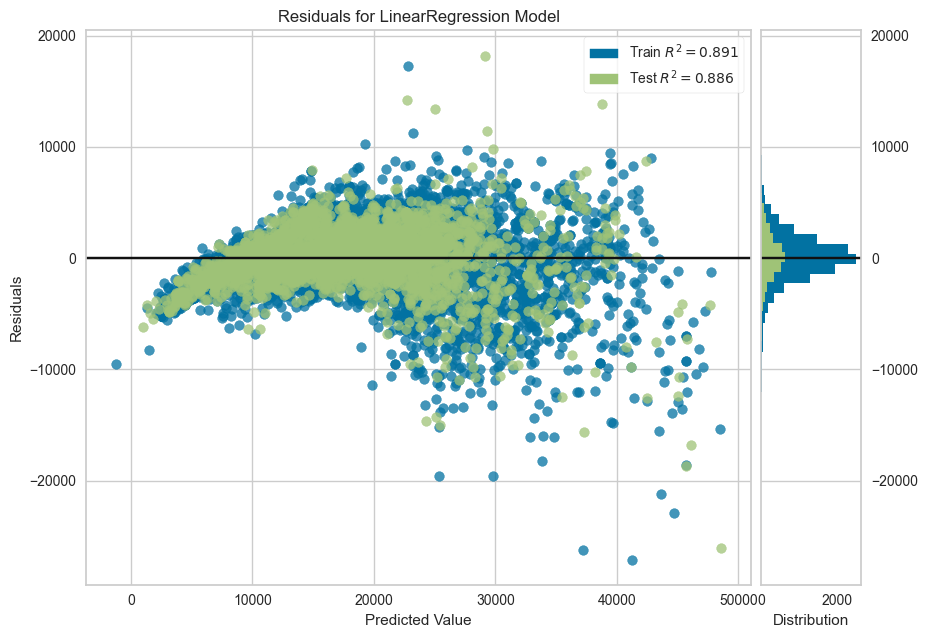

In [60]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

### Dropping observations from the dataset that worsen my predictions

#### test size = 0.2

In [61]:
df3 = df[~(df.price>35000)]
df3.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [62]:
len(df[df.price>35000])

495

In [63]:
df2[df2.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [64]:
df2.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [65]:
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

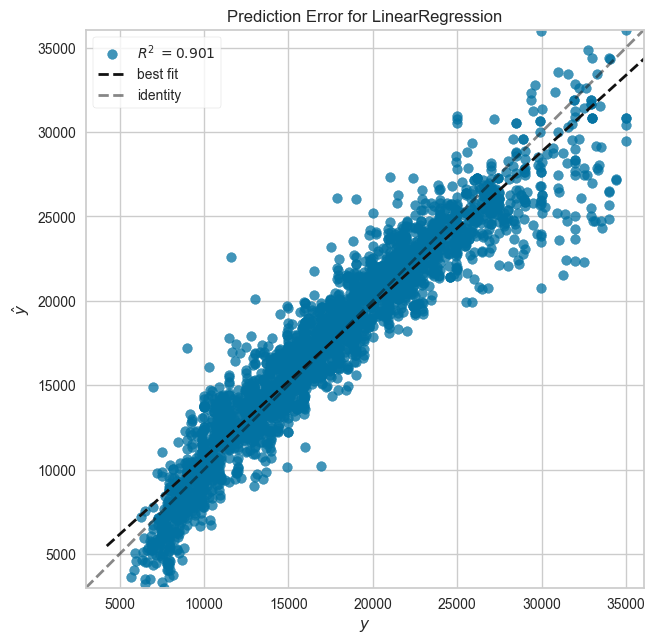

In [67]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [68]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.900,0.901
mae,1418.635,1400.504
mse,3794922.864,3664591.900
rmse,1948.056,1914.312


In [69]:
1914/df3.price.mean()

0.11071120929777156

In [70]:
2503/df2.price.mean()

0.13886746278386217

In [71]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [72]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [73]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
13958,9000,8375.573,624.427
13043,23351,20867.676,2483.324
8200,17890,18481.256,-591.256
4933,20890,20264.131,625.869
3001,14960,15159.321,-199.321
4398,19790,18421.028,1368.972
3317,28300,22886.291,5413.709
5051,27250,26582.379,667.621
10263,10690,13812.478,-3122.478
1461,22980,25362.989,-2382.989


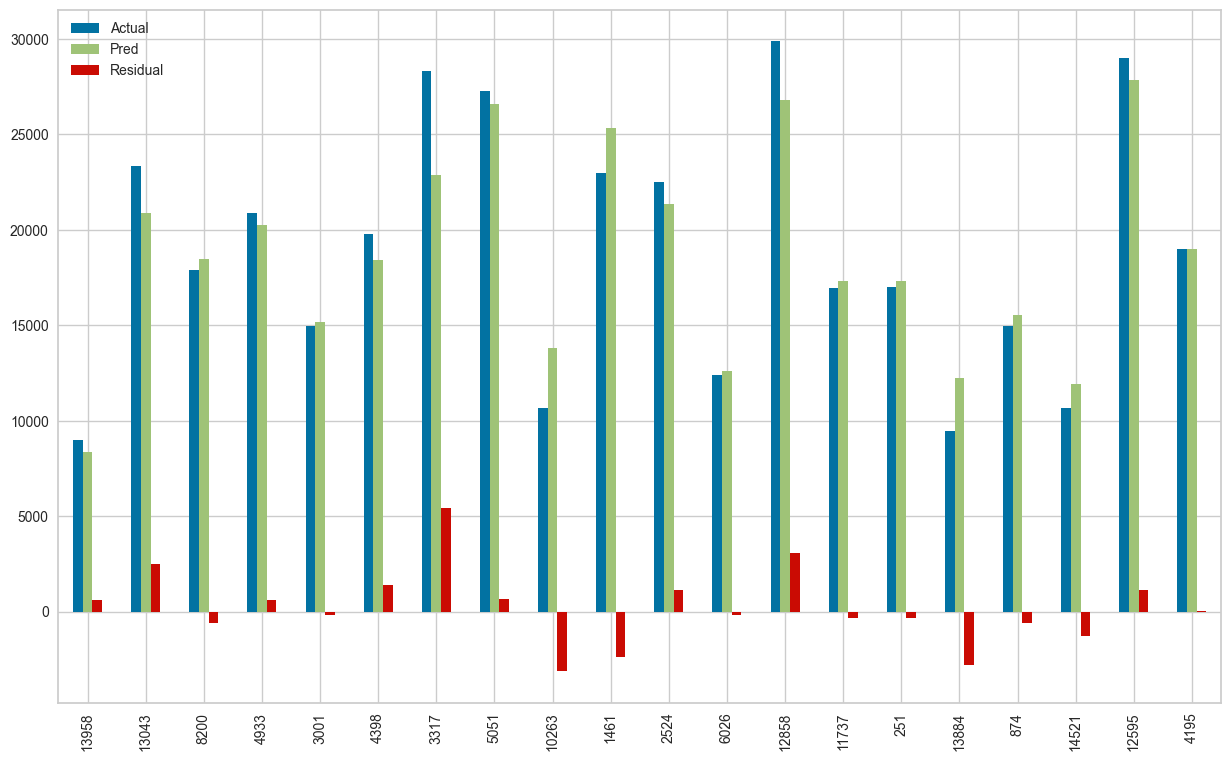

In [74]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [75]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9921.954
make_model_Renault Clio,-5500.114
make_model_Opel Corsa,-5459.926
make_model_Opel Astra,-3565.699
Type_Employee's car,-2093.149
Type_Used,-2001.788
Gearing_Type_Manual,-1541.037
age,-1462.784
Drive_chain_front,-1410.763
Drive_chain_rear,-1396.557


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

### Scaling

In [76]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge

### Random state=42

In [77]:
from sklearn.linear_model import Ridge, RidgeCV

In [78]:
ridge_model = Ridge(random_state=42)

In [79]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [80]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.789,1399.763
mse,3796678.095,3662786.099
rmse,1948.507,1913.841


### Finding best alpha for Ridge

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [83]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [84]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [85]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [86]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02, random_state=42)

In [87]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067,0.013,0.002,0.004,0.010,{'alpha': 0.01},-1980.637,-1983.578,-2063.026,-1938.249,-1953.814,-1932.014,-1988.311,-1978.189,-2034.167,-1928.672,-1978.066,41.523,2
1,0.069,0.006,0.003,0.004,1.020,{'alpha': 1.02},-1981.727,-1978.237,-2062.639,-1938.756,-1948.486,-1935.378,-1992.006,-1976.204,-2035.671,-1927.093,-1977.620,41.858,1
2,0.080,0.008,0.002,0.004,2.030,{'alpha': 2.03},-1983.073,-1975.177,-2062.941,-1939.955,-1945.952,-1938.487,-1995.993,-1976.062,-2037.691,-1926.951,-1978.228,42.167,3
3,0.097,0.012,0.005,0.005,3.040,{'alpha': 3.04},-1984.647,-1973.347,-2063.654,-1941.568,-1944.854,-1941.401,-2000.055,-1976.892,-2039.930,-1927.667,-1979.401,42.432,4
4,0.099,0.013,0.002,0.003,4.050,{'alpha': 4.05},-1986.404,-1972.315,-2064.650,-1943.445,-1944.620,-1944.167,-2004.099,-1978.302,-2042.272,-1928.928,-1980.920,42.660,5
5,0.103,0.011,0.002,0.004,5.060,{'alpha': 5.06},-1988.304,-1971.843,-2065.852,-1945.498,-1944.947,-1946.820,-2008.083,-1980.080,-2044.663,-1930.553,-1982.664,42.860,6
6,0.103,0.012,0.002,0.003,6.070,{'alpha': 6.07},-1990.315,-1971.780,-2067.206,-1947.670,-1945.659,-1949.383,-2011.990,-1982.103,-2047.077,-1932.423,-1984.561,43.039,7
7,0.098,0.006,0.003,0.004,7.080,{'alpha': 7.08},-1992.410,-1972.026,-2068.673,-1949.924,-1946.644,-1951.870,-2015.809,-1984.293,-2049.498,-1934.463,-1986.561,43.201,8
8,0.098,0.011,0.002,0.004,8.090,{'alpha': 8.09},-1994.568,-1972.511,-2070.225,-1952.234,-1947.828,-1954.292,-2019.540,-1986.599,-2051.918,-1936.620,-1988.634,43.349,9
9,0.104,0.012,0.004,0.004,9.100,{'alpha': 9.1},-1996.774,-1973.185,-2071.840,-1954.580,-1949.162,-1956.658,-2023.181,-1988.985,-2054.329,-1938.857,-1990.755,43.486,10


In [88]:
ridge_grid_model.best_index_

1

In [89]:
ridge_grid_model.best_score_

-1977.619805802377

In [90]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1418.795,1399.757
mse,3796741.194,3662792.595
rmse,1948.523,1913.842


In [91]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [92]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10629.403
make_model_Renault Duster,-8805.406
make_model_Opel Corsa,-5491.997
make_model_Renault Clio,-5477.417
age,-4427.746
make_model_Opel Astra,-3526.997
Displacement_cc,-2440.269
Type_Employee's car,-2076.149
Type_Used,-1993.716
Gearing_Type_Manual,-1558.270


## Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

### random state=42

In [93]:
from sklearn.linear_model import Lasso, LassoCV

In [94]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [95]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.723,1396.817
mse,3808435.223,3647222.237
rmse,1951.521,1909.770


### Finding best alpha for Lasso

In [96]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [97]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [98]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [99]:
lasso_grid_model.best_score_

-1976.8879951928193

In [100]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.779,1396.803
mse,3808860.485,3647145.516
rmse,1951.630,1909.750


In [101]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [102]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10618.221
make_model_Renault Duster,-7682.528
make_model_Opel Corsa,-5466.866
make_model_Renault Clio,-5417.008
age,-4443.859
make_model_Opel Astra,-3514.194
Displacement_cc,-2059.280
Type_Employee's car,-1979.332
Type_Used,-1916.507
Gearing_Type_Manual,-1579.796


## Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

### random state = 42

In [103]:
from sklearn.linear_model import ElasticNet

In [104]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [105]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.595,0.597
mae,3082.843,3076.232
mse,15282663.202,14844114.313
rmse,3909.305,3852.806


### Finding best alpha and l1_ratio for ElasticNet

### random state = 42

In [106]:
elastic_model = ElasticNet(random_state=42)

In [107]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [108]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [109]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [110]:
elastic_grid_model.best_score_

-1976.8879951928193

In [111]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.899,0.901
mae,1420.779,1396.803
mse,3808860.485,3647145.516
rmse,1951.630,1909.750


In [112]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature Importance

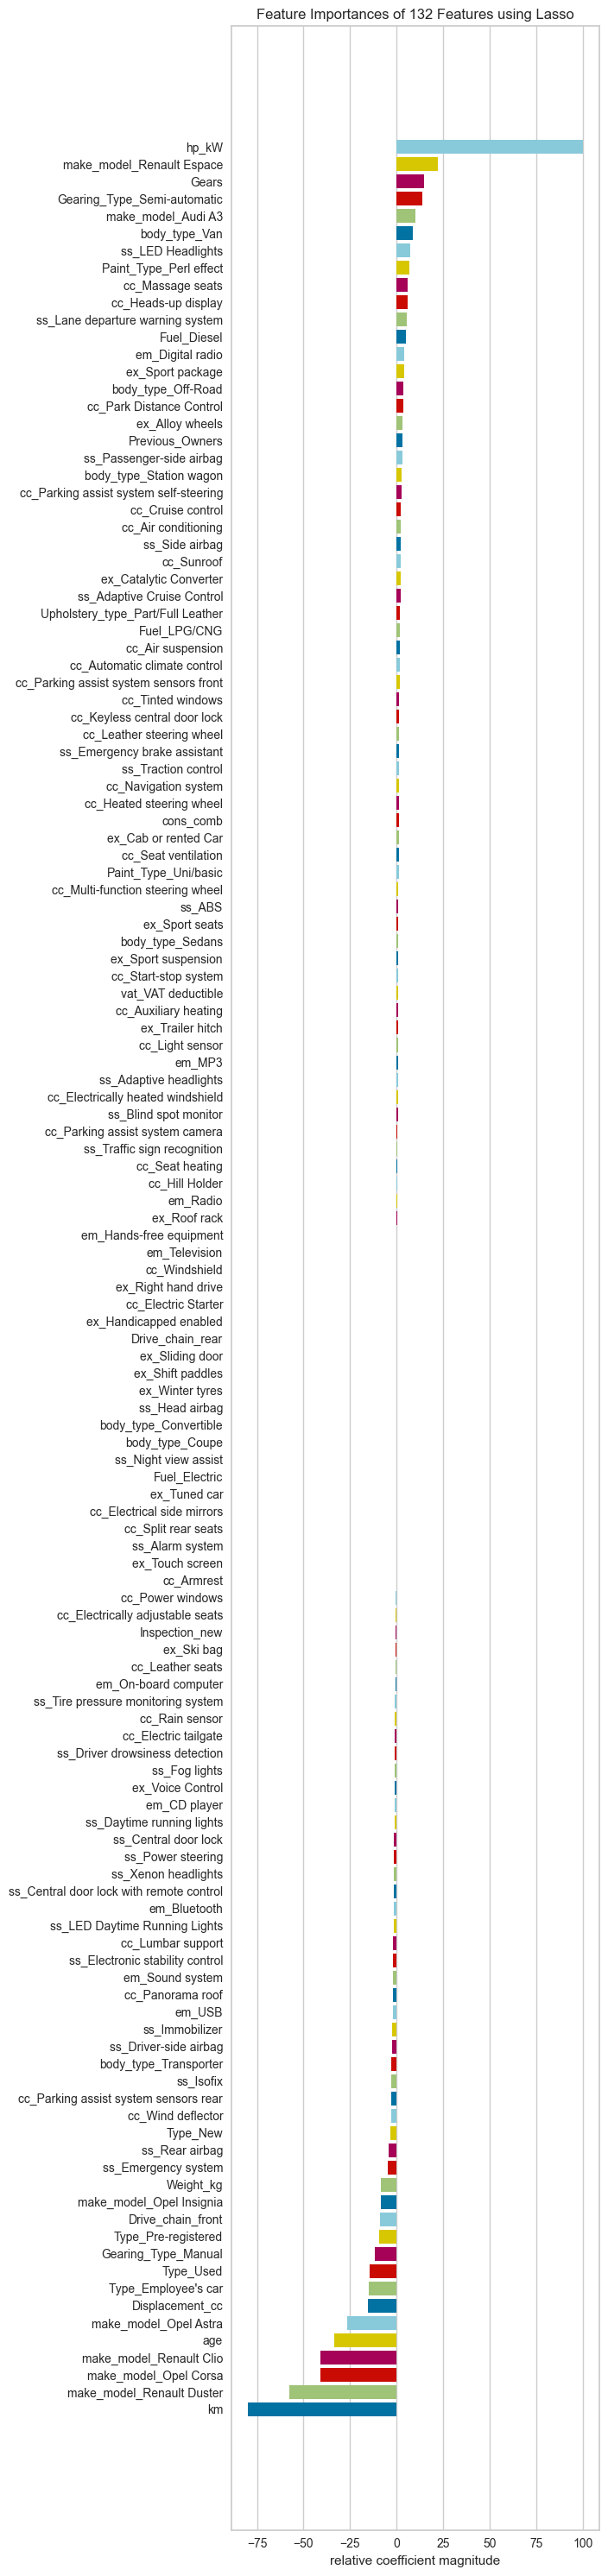

In [113]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [114]:
df_new = df2[["make_model", "hp_kW", "km","age", "Gearing_Type", "price"]]

In [115]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [116]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [117]:
df_new.drop(index=[2614], inplace =True)

In [118]:
df_new = df_new[~(df_new.price>35000)]

In [119]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0


In [120]:
len(df_new)

15419

In [121]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [125]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [126]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [127]:
lasso_final_model.best_score_

-2239.588352950935

In [128]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [129]:
2132/df_new.price.mean()

0.1233209499596912

In [130]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Visually Compare Models Performance In a Graph

In [131]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901,1400.504,1914.312
ridge_m,0.901,1399.757,1913.842
lasso_m,0.901,1396.803,1909.750
elastic_m,0.901,1396.803,1909.750
final_m,0.877,1553.998,2132.539


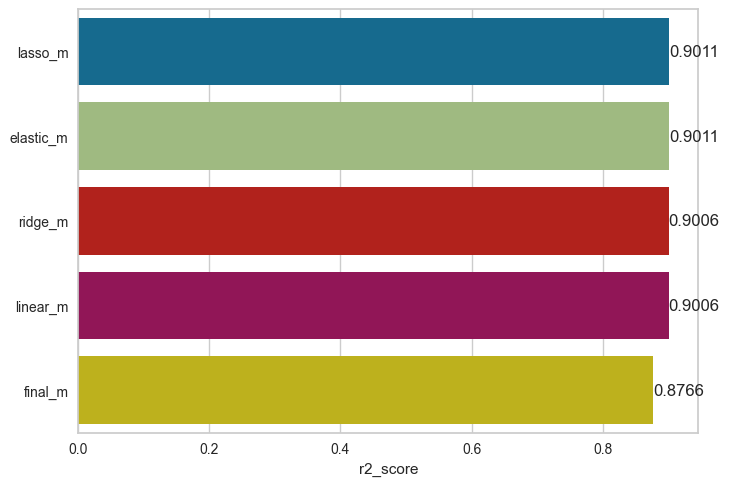

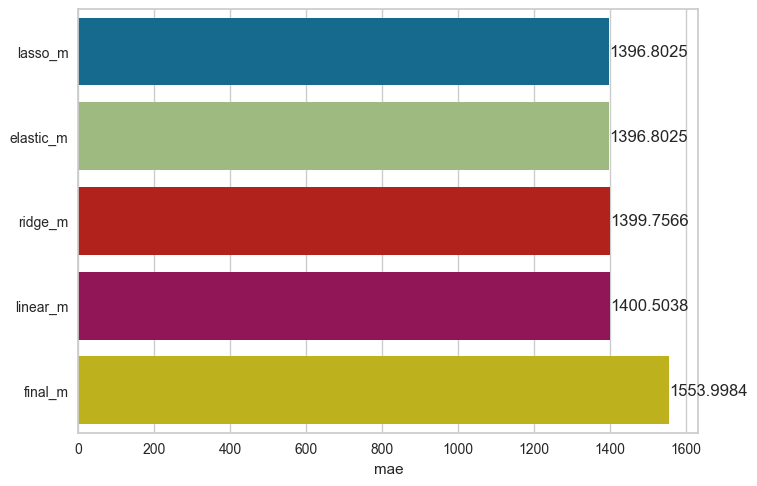

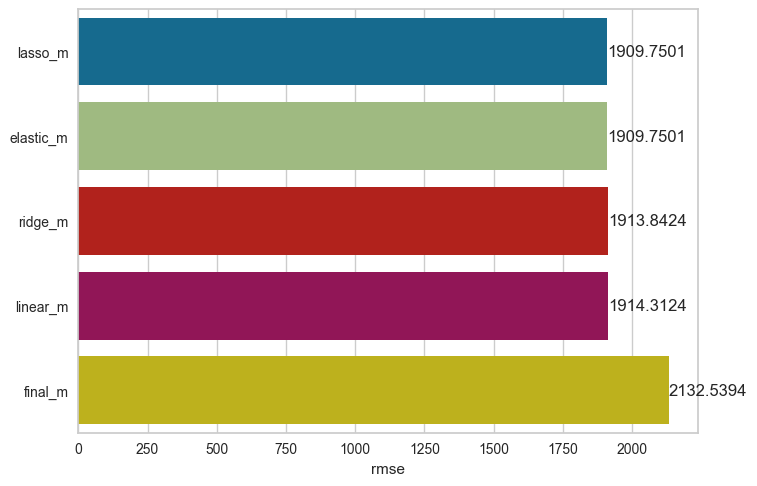

In [132]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

### random state=42

In [133]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [134]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [135]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [136]:
final_model.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [137]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [138]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [139]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [140]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,1,0,0


In [141]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,1,0,0,0,0,0,0,1,0,0


In [142]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [143]:
final_model.predict(my_dict)

array([19559.29001107])

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___